### Let's create a function(with docstring)

In [51]:
def calculate_sma(prices, window):
    """
    Calculate the Simple Moving Average (SMA) for a given window.

    Parameters:
    prices (list of float): List of historical prices.
    window (int): The window size for calculating the SMA.

    Returns:
    float: The calculated SMA.
    """
    if len(prices) < window:
        raise ValueError("The number of prices should be greater than or equal to the window size.")
    sma = sum(prices[-window:]) / window
    return sma


In [52]:
prices = [10, 20, 30, 40, 50]
window = 3
sma = calculate_sma(prices, window)
print(sma)  # Output: 40.0


40.0


In [1]:
# function
# function_name(input)


In [2]:
# print(type.__doc__)

### 2 Point of views


### Parameters vs. Arguments and Types of Arguments
- Parameters are the variables listed inside the parentheses in the function definition.
- Arguments are the values passed to the function when it is called.

### Types of Arguments

- Default Argument: Provides a default value if none is supplied.
- Positional Argument: The arguments that need to be included in the proper position/order.
- Keyword Argument: Arguments passed by keyword, not position.

In [27]:
def moving_average(prices, window=5):
    """
    Calculate the moving average for a given window.

    Parameters:
    prices (list): List of prices.
    window (int): The window size for the moving average. Default is 5.

    Returns:
    list: Moving average values.
    """
    import pandas as pd
    return pd.Series(prices).rolling(window=window).mean().tolist()

prices = [10, 11, 12, 13, 14, 15, 16]
print(moving_average(prices))  # Default window of 5
print(moving_average(prices, window=3))  # Window of 3


[nan, nan, nan, nan, 12.0, 13.0, 14.0]
[nan, nan, 11.0, 12.0, 13.0, 14.0, 15.0]


In [28]:
def calculate_profit(open_price, close_price):
    """
    Calculate the profit from a trade.

    Parameters:
    open_price (float): The opening price.
    close_price (float): The closing price.

    Returns:
    float: Profit from the trade.
    """
    return close_price - open_price

print(calculate_profit(100, 110))  # 10


10


In [29]:
def place_order(symbol, quantity, order_type="market"):
    """
    Place an order for a stock.

    Parameters:
    symbol (str): The stock symbol.
    quantity (int): Number of shares.
    order_type (str): Type of order (market or limit). Default is market.

    Returns:
    str: Order description.
    """
    return f"Placed {order_type} order for {quantity} shares of {symbol}."

print(place_order(symbol="AAPL", quantity=10))  # Market order by default
print(place_order(symbol="AAPL", quantity=10, order_type="limit"))  # Limit order


Placed market order for 10 shares of AAPL.
Placed limit order for 10 shares of AAPL.


### `*args and **kwargs`
`*args and **kwargs` are special Python keywords that are used to pass the variable length of arguments to a function


`*args` Allows passing a variable number of non-keyword arguments.

`**kwargs` Allows passing a variable number of keyword arguments.

In [30]:
# **kwargs
# **kwargs allows us to pass any number of keyword arguments.
# Keyword arguments mean that they contain a key-value pair, like a Python dictionary.

# *args
# allows us to pass a variable number of non-keyword arguments to a function.

def calculate_total_cost(*prices):
    """
    Calculate the total cost from multiple prices.

    Parameters:
    *prices (float): Variable number of price arguments.

    Returns:
    float: Total cost.
    """
    return sum(prices)

print(calculate_total_cost(100, 200, 300))  # 600
print(calculate_total_cost(50, 75))  # 125



600
125


In [31]:
def describe_trade(**kwargs):
    """
    Describe a trade with various attributes.

    Parameters:
    **kwargs (dict): Variable number of keyword arguments representing trade attributes.

    Returns:
    None
    """
    for key, value in kwargs.items():
        print(f"{key}: {value}")

describe_trade(symbol="AAPL", quantity=10, price=150)
# symbol: AAPL
# quantity: 10
# price: 150


symbol: AAPL
quantity: 10
price: 150


##### Points to remember while using `*args and **kwargs`

- order of the arguments matter(normal -> `*args` -> `**kwargs`)
- The words “args” and “kwargs” are only a convention, you can use any name of your choice


### How Functions are executed in memory?



1. **Function Definition**:
   - When a function is defined, Python creates a function object and assigns it to the function’s name. This object contains the function's bytecode, its default argument values, and references to global variables.

2. **Memory Allocation**:
   - Memory is allocated for the function object, which includes:
     - The compiled function bytecode.
     - References to the function’s default arguments.
     - References to any free variables (in the case of closures).

3. **Function Call**:
   - When a function is called, Python allocates a new frame on the call stack for the function execution. This frame contains:
     - Local variables.
     - Arguments passed to the function.
     - A reference to the function’s code object.
     - A reference to the function’s global variables.

4. **Argument Passing**:
   - The arguments passed to the function call are assigned to the function’s parameters. If the arguments include `*args` or `**kwargs`, they are also processed accordingly.

5. **Executing the Function**:
   - Python executes the function’s bytecode within the new frame. If the function calls another function, a new frame is pushed onto the stack for the called function.

6. **Return Value**:
   - When the function completes its execution, it returns a value (if any). The return value is sent back to the caller.
   - The function’s frame is then popped from the call stack, and memory allocated for local variables within that frame is freed.

7. **Continuing Execution**:
   - Execution resumes in the calling function, with the returned value being used as needed.



#### Execution Flow:

1. **Definition Phase**:
   - `add`, `multiply`, and `main` functions are defined. Python creates function objects for each and stores them in memory.

2. **Calling `main`**:
   - A new frame for `main` is created and pushed onto the call stack.

3. **Inside `main`**:
   - `add(5, 3)` is called.
   - A new frame for `add` is created and pushed onto the call stack.

4. **Executing `add`**:
   - The parameters `a` and `b` are assigned the values `5` and `3`.
   - The function calculates the sum (`8`) and returns it.
   - The frame for `add` is popped from the call stack.

5. **Back to `main`**:
   - The returned value (`8`) is assigned to `sum_result`.
   - `multiply(sum_result, 10)` is called.
   - A new frame for `multiply` is created and pushed onto the call stack.

6. **Executing `multiply`**:
   - The parameters `x` and `y` are assigned the values `8` and `10`.
   - The function calculates the product (`80`) and returns it.
   - The frame for `multiply` is popped from the call stack.

7. **Back to `main`**:
   - The returned value (`80`) is assigned to `product_result`.
   - `main` returns `product_result`.

8. **Completing Execution**:
   - The frame for `main` is popped from the call stack.
   - The result (`80`) is printed.



In [49]:
### Example Execution Flow


def add(a, b):
    return a + b

def multiply(x, y):
    return x * y

def main():
    sum_result = add(5, 3)
    product_result = multiply(sum_result, 10)
    return product_result

# Function call
result = main()
print(result)


80


### Without return statement

In [1]:
def print_sum(a, b):
    """
    This function prints the sum of two numbers.
    """
    result = a + b
    print("Sum:", result)

def print_product(x, y):
    """
    This function prints the product of two numbers.
    """
    result = x * y
    print("Product:", result)

def main():
    print_sum(5, 3)
    print_product(4, 2)

# Function call
main()


Sum: 8
Product: 8


### Variable Scope

In [50]:
# Global variable
global_var = "I am a global variable"

def variable_scope_example():
    # Local variable
    local_var = "I am a local variable"
    
    print("Inside the function:")
    print(global_var)  # Accessing the global variable
    print(local_var)   # Accessing the local variable

# Calling the function
variable_scope_example()

# Trying to access the local variable outside the function will cause an error
# print(local_var)  # Uncommenting this line will raise a NameError

print("Outside the function:")
print(global_var)  # Accessing the global variable


Inside the function:
I am a global variable
I am a local variable
Outside the function:
I am a global variable


### Nested Functions

In [12]:
def trading_dec(price):
    def buy_dec():
        return "Buy"
    
    def sell_dec():
        return "Sell"
    
    if price < 50:
        return buy_dec()
    else:
        return sell_dec()




In [14]:
print(trading_dec(40))

Buy


### Functions are 1st class citizens

In [17]:
#type & ID

def tradding_logs():
    pass
print(type(tradding_logs))
print(id(tradding_logs))

<class 'function'>
4566484448


In [18]:
#Re-assign
def tradding_logs(price1,price2):
    return price1 + price2


    

In [21]:
sum_price = tradding_logs
sum_price(2,3)

5

In [23]:
#Deleting a function

def tradding_logs():
    return "Analyzing a function deletion "

In [26]:
print(tradding_logs())
del tradding_logs
print(tradding_logs())

Analyzing a function deletion 


NameError: name 'tradding_logs' is not defined

In [30]:
# storing
def buy_stock(stock):
    return f"Buy  {stock}"
def sell_stock(stock):
    return f"Sell  {stock}"

actions = {"buy":buy_stock,"sell":sell_stock}
actions["sell"]("BTC")

'Sell  BTC'

In [31]:
# returning a function

def strategy_selection(strategy_name):
    
    def momentum_strategy():
        return "Momentum Strategy"
    def mean_reversion_strategy():
        return "Mean Reversion Stragey"
    
    if strategy_name == "momentum":
        return momentum_strategy
    else:
        return mean_reversion_strategy

In [37]:
strategy = strategy_selection("momeasdfntum")
print(strategy())

Mean Reversion Stragey


In [38]:
# function as argument


def moving_average_strategy(price):
    return sum(price)/len(price)

def execute_strategy(stragey_func, price):
    return stragey_func(price)


In [39]:
price = [10,20,30,50,60]
print(execute_strategy(moving_average_strategy,price))

34.0


### Benefits of using a Function

- Code Modularity: Breaking down code into smaller functions makes it easier to manage and understand.
- Code Readability: Clearer and more understandable code.
- Code Reusability: Functions can be reused across different parts of a program.

In [39]:
def calculate_moving_average(prices, window):
    import pandas as pd
    return pd.Series(prices).rolling(window=window).mean()

def apply_strategy(prices):
    ma = calculate_moving_average(prices, 5)
    return ma

prices = [10, 11, 12, 13, 14, 15, 16]
print(apply_strategy(prices))


0     NaN
1     NaN
2     NaN
3     NaN
4    12.0
5    13.0
6    14.0
dtype: float64


In [40]:
def calculate_moving_average(prices, window):
    """
    Calculate the moving average for a given window.

    Parameters:
    prices (list): List of prices.
    window (int): The window size for the moving average.

    Returns:
    list: Moving average values.
    """
    import pandas as pd
    return pd.Series(prices).rolling(window=window).mean().tolist()

prices = [10, 11, 12, 13, 14, 15, 16]
print(calculate_moving_average(prices, window=3))


[nan, nan, 11.0, 12.0, 13.0, 14.0, 15.0]


In [41]:
def calculate_moving_average(prices, window):
    """
    Calculate the moving average for a given window.

    Parameters:
    prices (list): List of prices.
    window (int): The window size for the moving average.

    Returns:
    list: Moving average values.
    """
    import pandas as pd
    return pd.Series(prices).rolling(window=window).mean().tolist()

prices1 = [10, 11, 12, 13, 14, 15, 16]
prices2 = [20, 21, 22, 23, 24, 25, 26]
print(calculate_moving_average(prices1, window=3))
print(calculate_moving_average(prices2, window=3))


[nan, nan, 11.0, 12.0, 13.0, 14.0, 15.0]
[nan, nan, 21.0, 22.0, 23.0, 24.0, 25.0]


### Lambda Function

A lambda function is a small anonymous function.

A lambda function can take any number of arguments, but can only have one expression.

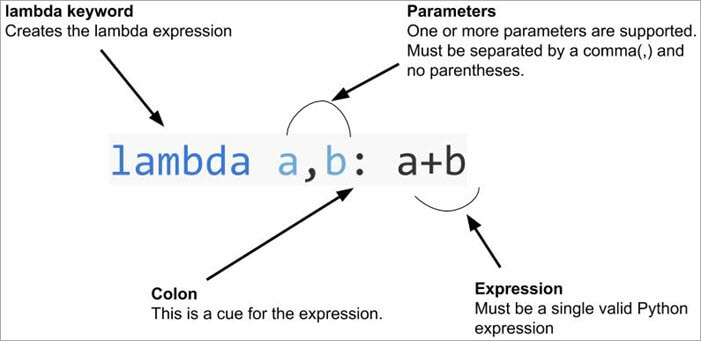

#### Diff between lambda vs Normal Function

- No name
- lambda has no return value(infact,returns a function)
- lambda is written in 1 line
- not reusable

Then why use lambda functions?<br>
**They are used with HOF**


In [77]:
prices = [1,2,3,4,5,6,7,8]
moving_average = lambda prices : sum(prices[-4:])/4
print(moving_average(prices))

6.5


In [66]:
# Normal Function
def moving_aveerage(prices,window):
    sma = (sum(prices[-window:]))/window
    return sma


In [67]:
prices = [1,2,3,4,5,6,7,8]
moving_aveerage(prices,4)

6.5

### Higher Order Functions

In [44]:
# Example



# HOF


### Map

In [16]:
# Using map to calculate the square of a list of numbers (e.g., price changes)
# price = [2,3,4,-5,-6,-7]
# list(map(lambda x:x**2,price))


# Using map to label prices as "high" or "low"
price = [200,300,400,-500,-600,-700]

list(map(lambda x : "High" if x>200 else "Low",price))

# Fetch names from a list of stock information dictionaries

stocks = [{"symbol" : "AAPL", "name":"Apple"},{"symbol" : "BTC", "name":"Bitcoin"}]
list(map(lambda x : x["name"], stocks))


['Apple', 'Bitcoin']

### Filter

In [23]:
# Filter prices greater than 100
prices = [50,60,70,100,110,120]
list(filter(lambda x :x >100,prices))
# Filter stocks starting with 'A'

stocks = ["Apple", "Microsoft","Amazon","Meta"]
list(filter(lambda x : x.startswith("A"), stocks))

['Apple', 'Amazon']

### Reduce

In [29]:
# Sum
from functools import reduce

numbers1 = [1,2,3,4,5,6,7,8,9,10]
reduce(lambda x,y: x+y,numbers)

# Find the min price
numbers2 = [2,3,4,5,6,7,8,9,10,1]
reduce(lambda x,y : x if x<y else y,numbers2)


1